# ENGR-E 221 Intelligent Systems I Fall 2020

## Lab 9 Decision Trees

Thursday Lab: 10/29/2020 3:15 pm - 4:30 pm

Friday Lab: 10/30/2020 9:25 am - 10:40 am

### Outline

1) Review on parametric vs non parametric statistics and supervised vs unsupervised 
 
2) Introduction to Decision Trees with IRIS

3) Decision Trees with the built in Breast Cancer Dataset

4) Introduction to Decision Tree Regressor


## Review (15 minutes)

As a class exercise we will take some time to review the differnces between parametric and nonparamtric machine learning algorithms as well as review the differences between supervised and unsupervised machine learning models. We will accomplish this by reading the two articles and as a class we will come up with definitions. 


Parametric: 

Nonparametric:

[Hana Medium Article Parametric vs nonparametric](https://medium.com/@lamiae.hana/parametric-and-nonparametric-machine-learning-algorithms-ec9a21f25705)

Supervised:

Unsupervised:

[Soni Artivle Supervised vs Unsupervised](https://medium.com/@lamiae.hana/parametric-and-nonparametric-machine-learning-algorithms-ec9a21f25705)


## Introduction (5 minutes) 

Here is the documentation for scikit learn user guide for Decision Trees [Decision Trees scikit](https://scikit-learn.org/stable/modules/tree.html#tree) and here is the documentation [Decision Trees doc](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)


Use this bit of code from the user guide and discuss the values of X and Y as well as what the prediction and probabilities represent. 

```python
from sklearn import tree
#use a different number schemne 
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
test = [0.,1.]
prediction = clf.predict([test])
probabiltiy = clf.predict_proba([test])
tree.plot_tree(clf) 

print('The predicted class of', test, 'is :', prediction, 'The predicted probability of', test, 'is:', probabiltiy) 
```


For better visuals inside the notebook we can use IPyhon.display with graphviz. You may have to pip install graphviz.

```python
import graphviz
from IPython.display import display
display(graphviz.Source(export_graphviz(clf)))
```

Using tree.plot_tree(mdl) produces the tree and work if you are saving the file just fine but viewing inside a notebook is often difficult to read.

Useful article about entropy and the gini index: [gini coef](https://medium.com/analytics-steps/understanding-the-gini-index-and-information-gain-in-decision-trees-ab4720518ba8)

The predicted class of [0.0, 1.0] is : [0] The predicted probability of [0.0, 1.0] is: [[1. 0.]]


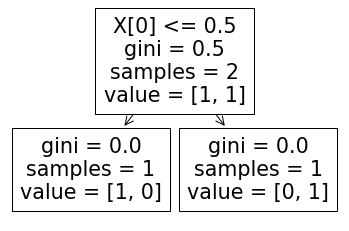

In [1]:
# place for intro code this is from the user guided
from sklearn import tree

X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
test = [0.,1.]
prediction = clf.predict([test])
probabiltiy = clf.predict_proba([test])
tree.plot_tree(clf) 

print('The predicted class of', test, 'is :', prediction, 'The predicted probability of', test, 'is:', probabiltiy)

## Task 1: Use a Decision Tree to classify the IRIS Dataset (15 minutes) 

* Load the iris data. 

* Instatiate the model. 

* Fit the model. 

* Visuliaze the treee. 

* Discuss your tree.

**Be prepared to discuss your results with the class.**

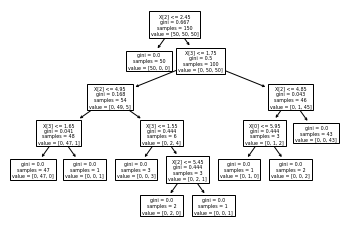

In [9]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt


iris = load_iris()
clf = tree.DecisionTreeClassifier()
X = iris.data
Y = iris.target
clf = clf.fit(X,Y)
tree.plot_tree(clf) 
plt.show()

#from IPython.display import display
#display(graphviz.Source(export_graphviz(clf)))

## Task 2: Repeat **Task 1** using the breast cancer data (10 minutes) 


```pyhton
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
```

**Be prepared to discuss your definition with the class.**

In [3]:
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import graphviz

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
clf = DecisionTreeClassifier(max_depth = 1000)
x_train,x_test,y_train,y_test = train_test_split(x,y)

fig = clf.fit(x_train,y_train)
#tree.plot_tree(fig)
#plt.show()

from IPython.display import display
display(graphviz.Source(export_graphviz(clf)))

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

## Task 3: Explore the Boundries of the Tree (15 minutes) 

This code was recreated from here: [Boundries of a Decision Tree with IRIS](https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py)

As we showcased boundries with the SVM example here will showcase the boundries created by the decision tree in order to create the classifications.

```python
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()
```


**Be prepared to discuss your results with the class.**

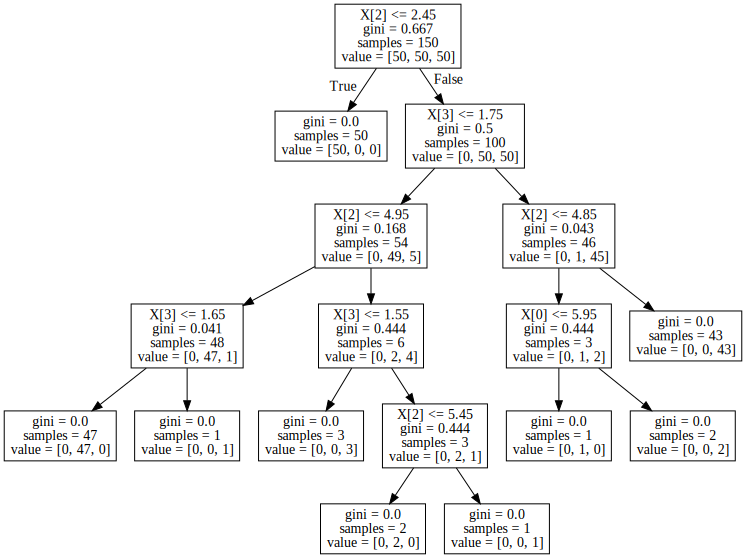

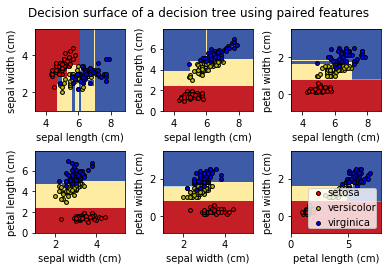

<Figure size 432x288 with 0 Axes>

In [43]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
#plot_tree(clf, filled=True)
#plt.show()
from IPython.display import display
display(graphviz.Source(export_graphviz(clf)))

## Task 4: Decision Tree Regressor  (20 minutes) 

Here is an example of how to use decision trees for regression. Pay attention to the max_depth argument. 


```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(100, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y[::5, :] += (0.5 - rng.rand(20, 2))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

# Predict
X_test = np.arange(-100.0, 100.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

# Plot the results
plt.figure()
s = 25
plt.scatter(y[:, 0], y[:, 1], c="navy", s=s,
            edgecolor="black", label="data")
plt.scatter(y_1[:, 0], y_1[:, 1], c="cornflowerblue", s=s,
            edgecolor="black", label="max_depth=2")
plt.scatter(y_2[:, 0], y_2[:, 1], c="red", s=s,
            edgecolor="black", label="max_depth=5")
plt.scatter(y_3[:, 0], y_3[:, 1], c="orange", s=s,
            edgecolor="black", label="max_depth=8")
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Multi-output Decision Tree Regression")
plt.legend(loc="best")
plt.show()
```


**Be prepared to discuss your results with the class.**

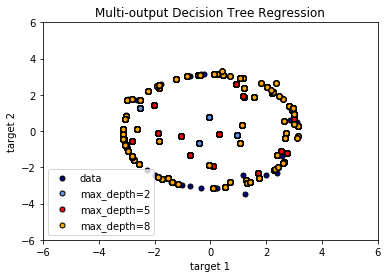

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(100, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y[::5, :] += (0.5 - rng.rand(20, 2))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

# Predict
X_test = np.arange(-100.0, 100.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

# Plot the results
plt.figure()
s = 25
plt.scatter(y[:, 0], y[:, 1], c="navy", s=s,
            edgecolor="black", label="data")
plt.scatter(y_1[:, 0], y_1[:, 1], c="cornflowerblue", s=s,
            edgecolor="black", label="max_depth=2")
plt.scatter(y_2[:, 0], y_2[:, 1], c="red", s=s,
            edgecolor="black", label="max_depth=5")
plt.scatter(y_3[:, 0], y_3[:, 1], c="orange", s=s,
            edgecolor="black", label="max_depth=8")
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Multi-output Decision Tree Regression")
plt.legend(loc="best")
plt.show()